In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
def sky_averaged_sigmasq_ratio(k, r, relative_to_no_confusion=False):
    k -= 1
    # k is the ASD ratio between the confusion noise and detector noise.
    k = k**2 # convert to PSD ratio
    if relative_to_no_confusion == False:
        ratio = 2*(1+k-k*r**2)/((1+k)**2-(k*r)**2)*(1+k)
    else:
        ratio = 2*(1+k-k*r**2)/((1+k)**2-(k*r)**2)
    return ratio

100%|██████████| 500/500 [00:00<00:00, 915.35it/s]


[[2.         2.         2.         ... 2.         2.         2.        ]
 [2.         2.         2.         ... 1.99999872 1.99999872 1.99999871]
 [2.         2.         2.         ... 1.99999488 1.99999487 1.99999486]
 ...
 [2.         1.99999801 1.99999203 ... 1.67120972 1.67032632 1.66944351]
 [2.         1.999998   1.999992   ... 1.66983107 1.6689436  1.66805671]
 [2.         1.99999799 1.99999197 ... 1.66844919 1.66755763 1.66666667]]
2.0000000000000004


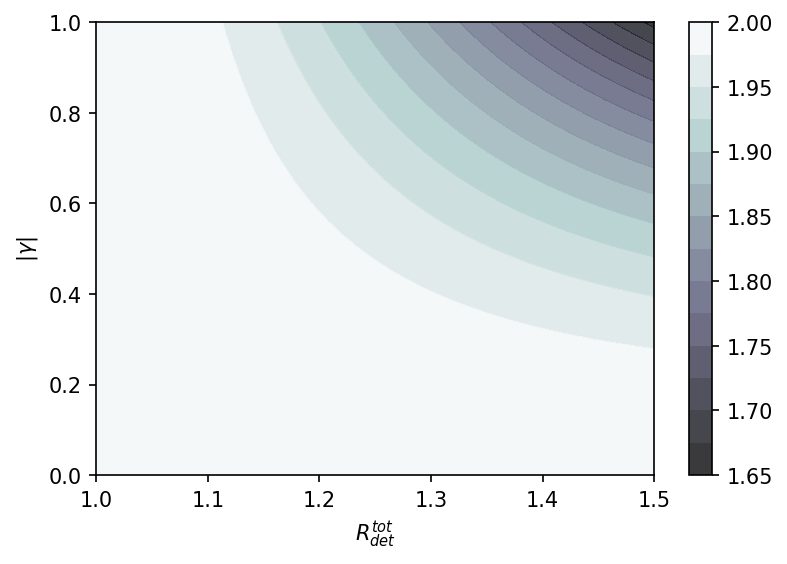

In [4]:
nx = 500
ny = 500
k_array = np.linspace(1, 1.5, nx)
r_array = np.linspace(0, 1, ny)
K, R = np.meshgrid(k_array, r_array)
effective_num_1 = np.zeros((nx,ny))
effective_num_2 = np.zeros((nx,ny))

for i in tqdm(range(len(K))):
    for j in range(len(R)):
        effective_num_1[i][j] = sky_averaged_sigmasq_ratio(K[i][j], R[i][j], relative_to_no_confusion=False)

print(effective_num_1)
print(np.max(effective_num_1))

fig, ax = plt.subplots(dpi=150)
CS1 = ax.contourf(K, R, effective_num_1, alpha=0.8, cmap=plt.cm.bone, levels=np.linspace(1.65, 2, 15))
cbar = fig.colorbar(CS1)
plt.xlabel(r"$R_{det}^{tot}$")
plt.ylabel(r"$\left | \gamma \right |$")
plt.savefig("correlated_noise_network_snr_loss.pdf", dpi=500)
plt.show()

100%|██████████| 500/500 [00:00<00:00, 1070.20it/s]


[[2.         1.99999799 1.99999197 ... 1.60256409 1.60128231 1.6       ]
 [2.         1.99999799 1.99999197 ... 1.60256307 1.60128128 1.59999897]
 [2.         1.99999799 1.99999197 ... 1.60255999 1.6012782  1.59999589]
 ...
 [2.         1.999996   1.999984   ... 1.33911035 1.33733199 1.33555481]
 [2.         1.99999599 1.99998397 ... 1.33800566 1.33622493 1.33444537]
 [2.         1.99999598 1.99998394 ... 1.33689838 1.33511527 1.33333333]]
2.0


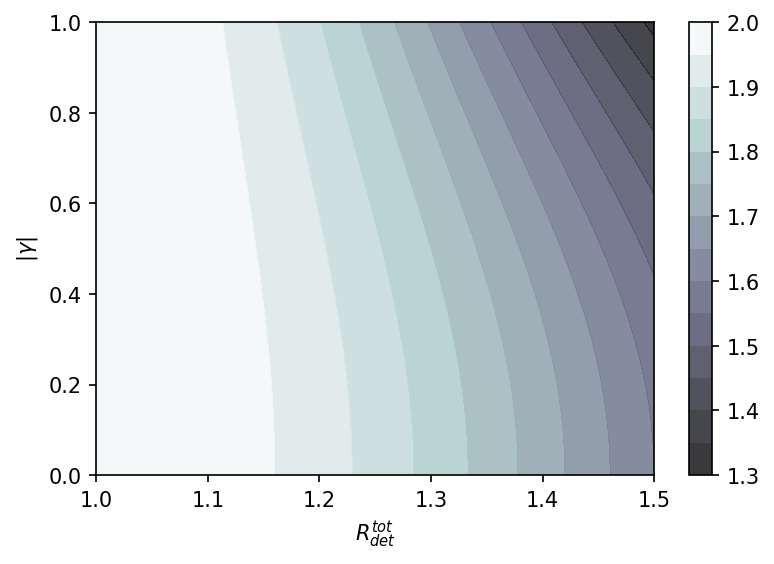

In [5]:
for i in tqdm(range(len(K))):
    for j in range(len(R)):
        effective_num_2[i][j] = sky_averaged_sigmasq_ratio(K[i][j], R[i][j], relative_to_no_confusion=True)

print(effective_num_2)
print(np.max(effective_num_2))

fig, ax = plt.subplots(dpi=150)
CS2 = ax.contourf(K, R, effective_num_2, alpha=0.8, cmap=plt.cm.bone, levels=np.linspace(1.3, 2, 15))
cbar = fig.colorbar(CS2)
plt.xlabel(r"$R_{det}^{tot}$")
plt.ylabel(r"$\left | \gamma \right |$")
plt.savefig("correlated_noise_network_snr_loss_optimal.pdf", dpi=500)
plt.show()

## Plot together

/tmp/ipykernel_1798/29062557.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


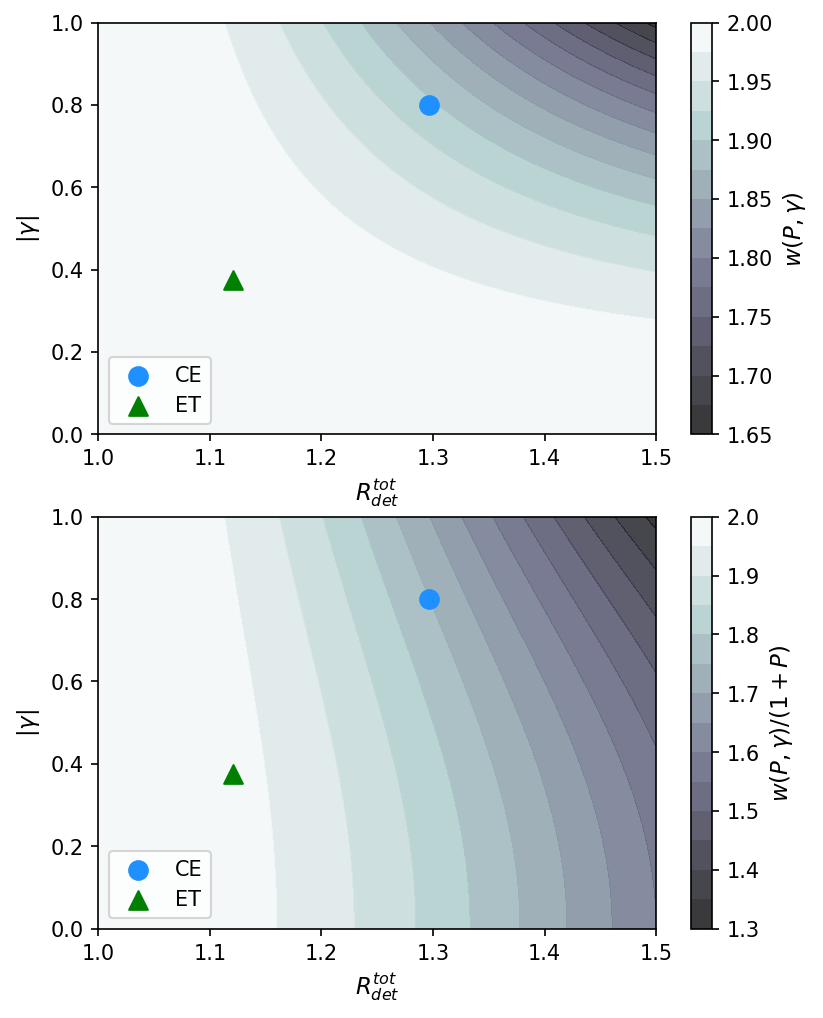

In [10]:
f = plt.figure(figsize=(6, 8), dpi=150)
ax1 = f.add_subplot(211)
ax2 = f.add_subplot(212)

ax1.contourf(K, R, effective_num_1, alpha=0.8, cmap=plt.cm.bone, levels=np.linspace(1.65, 2, 15))
cbar = plt.colorbar(CS1, ax=ax1)
cbar.set_label(r"$w(P,\gamma)$", fontsize=11)
ax1.set_xlabel(r"$R_{det}^{tot}$", fontsize=11)
ax1.set_ylabel(r"$\left | \gamma \right |$", fontsize=11)
ax1.scatter(1.296, 0.8, s=80, c='dodgerblue', marker="o", label="CE")
ax1.scatter(1.121, 0.375, s=80, c='green', marker="^", label="ET")
ax1.legend(loc="lower left")

ax2.contourf(K, R, effective_num_2, alpha=0.8, cmap=plt.cm.bone, levels=np.linspace(1.3, 2, 15))
cbar = plt.colorbar(CS2, ax=ax2)
cbar.set_label(r"$w(P,\gamma)/(1+P)$", fontsize=11)
ax2.set_xlabel(r"$R_{det}^{tot}$", fontsize=11)
ax2.set_ylabel(r"$\left | \gamma \right |$", fontsize=11)
ax2.scatter(1.296, 0.8, s=80, c='dodgerblue', marker="o", label="CE")
ax2.scatter(1.121, 0.375, s=80, c='green', marker="^", label="ET")
ax2.legend(loc="lower left")

f.savefig('correlated_noise_network_snr_loss_all.pdf', dpi=500)
f.show()